In [1]:
import numpy as np
import matplotlib.pyplot as plt
from inference_interface import multihist_to_template, template_to_multihist
from alea.utils import get_file_path
from alea.models import BlueiceExtendedModel

In [2]:
xe133_model_config_path = get_file_path("unbinned_ces_simple.yaml")
xe133_model = BlueiceExtendedModel.from_config(xe133_model_config_path)

Computing/loading models on one core: 100%|██████████| 15/15 [00:00<00:00, 1005.51it/s]


In [3]:
xe133_model.get_expectation_values()

{'xe133': 100000.0653520103}

In [4]:
source_name_list = xe133_model.get_source_name_list(likelihood_name="science_run_0")
source_name_list

['xe133']

In [5]:
data = xe133_model.generate_data()
xe133_model.data = data

In [6]:
data

{'science_run_0': array([(335.48738187, 0), ( 82.7245704 , 0), (132.9335631 , 0), ...,
        (102.57155908, 0), (199.90445591, 0), (201.37349021, 0)],
       dtype=[('ces', '<f8'), ('source', '<i8')]),
 'ancillary': array([(24.92101674,)], dtype=[('smearing_a', '<f8')]),
 'generate_values': array([(365., 24.8, 1.429, 100000.)],
       dtype=[('livetime', '<f8'), ('smearing_a', '<f8'), ('smearing_b', '<f8'), ('xe133_rate_multiplier', '<f8')])}

In [7]:
best_fit, max_ll = xe133_model.fit()
best_fit

{'livetime': 365.0,
 'xe133_rate_multiplier': 100165.04107672331,
 'smearing_a': 24.923854893672523,
 'smearing_b': 1.4505002368859685}

100013
99511
100140


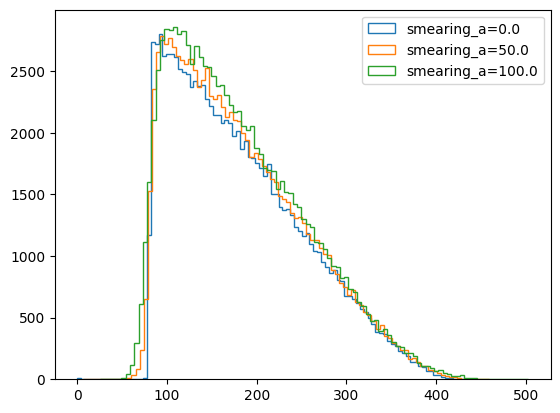

In [8]:
for smearing_a in np.linspace(0,100,3):
    data = xe133_model.generate_data(smearing_a=smearing_a)
    mask = data["science_run_0"]["source"] == source_name_list.index("xe133")
    plt.hist(data["science_run_0"]["ces"][mask],bins=100, histtype='step', label=f'smearing_a={smearing_a}')
    print(len(data["science_run_0"]["ces"][mask]))
plt.legend()
plt.show()